# Title: WES_237A_assignment4_report
# PID: A69028485
# Name: William Wei
# GitHub username: William Lien Chin Wei
# Email (registered with GitHub): williams19834812@gmail.com
# Video demonstration of your working code on https://www.youtube.com/watch?v=QLHV0BKBerE

# Assignments Rubric checklist
(<font color='blue'>$\textbf{Done}$</font>) Report Submitted? <br>
(<font color='blue'>$\textbf{Done}$</font>) Video Uploaded? <br>
(<font color='blue'>$\textbf{Done}$</font>) Code Pushed to Github? <br>
(<font color='blue'>$\textbf{Done}$</font>) Does the video demonstration show correct execution? <br>
(<font color='blue'>$\textbf{Yes}$</font>) Is the submitted code correct? <br>
(<font color='blue'>$\textbf{Well-done}$</font>) How well does the report outlines the design of the code? <br>
(<font color='blue'>$\textbf{Well-done}$</font>)How well does the report describe the results? <br>
(<font color='blue'>$\textbf{Yes}$</font>) Does the Report detail the student's grasp on the goals/objectives of the assignment? <br>

# Part A4.1
The learning objectives for this assignment are <br>
• Run a server and client on the same machine on separate processes <br>
• Connect to and disconnect from a remote server  <br>
• Communicate button presses between PYNQ boards. <br>

In this part, each board will be using the $\textbf{Buzzer}$ sensor module.
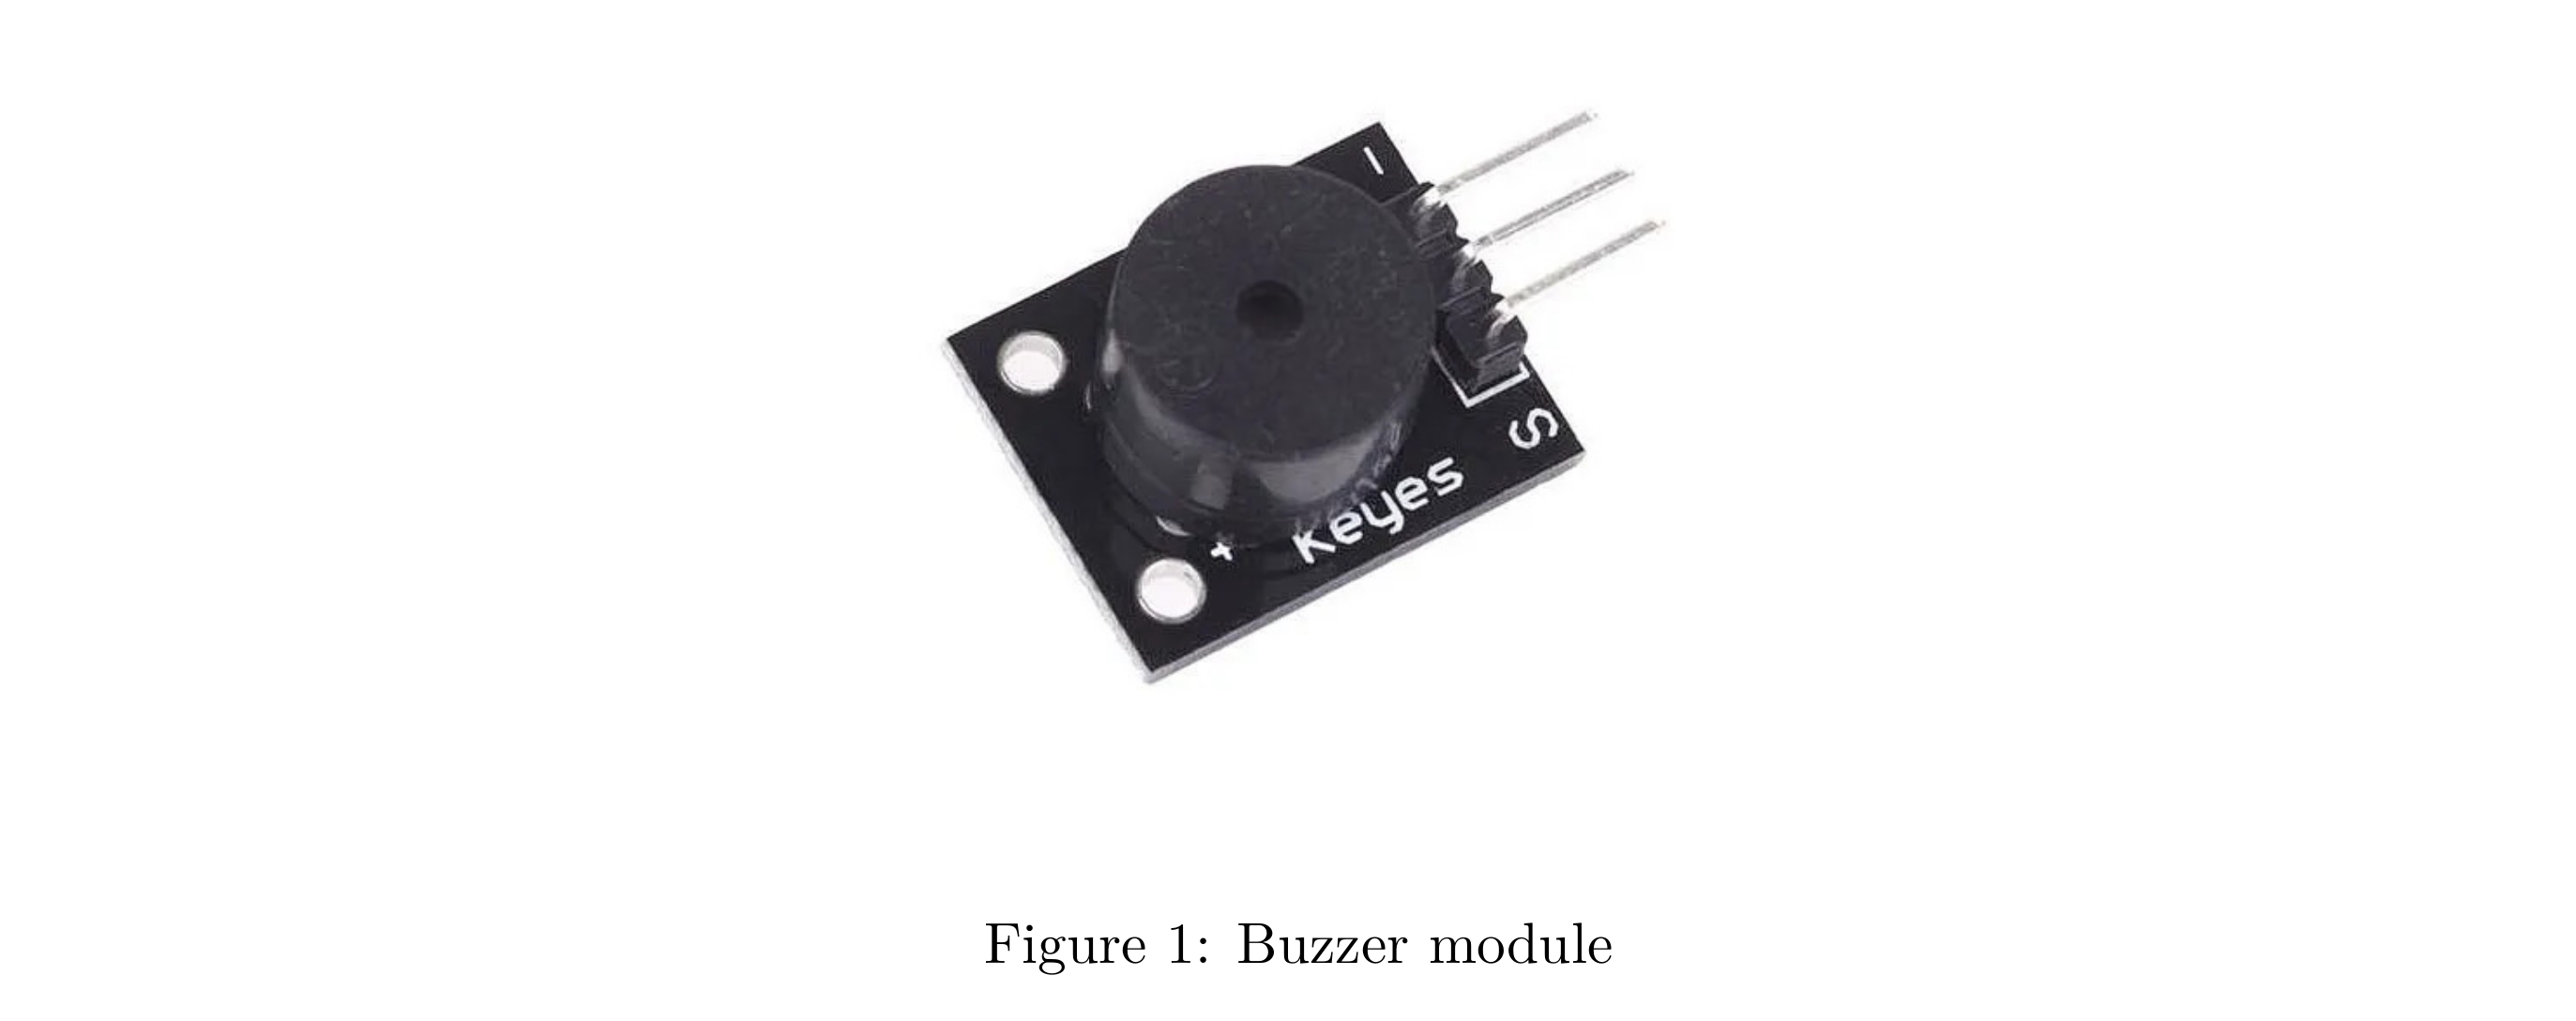

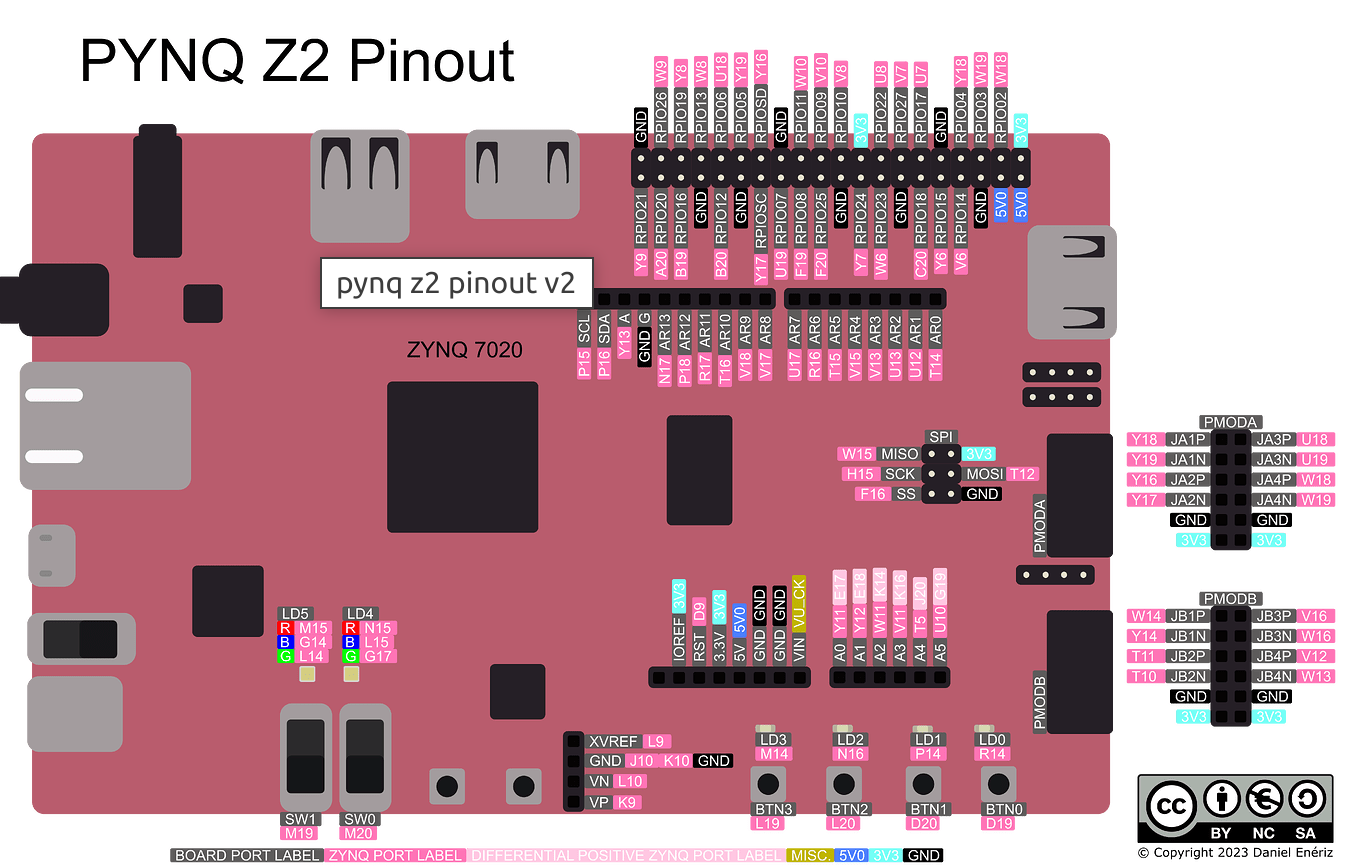

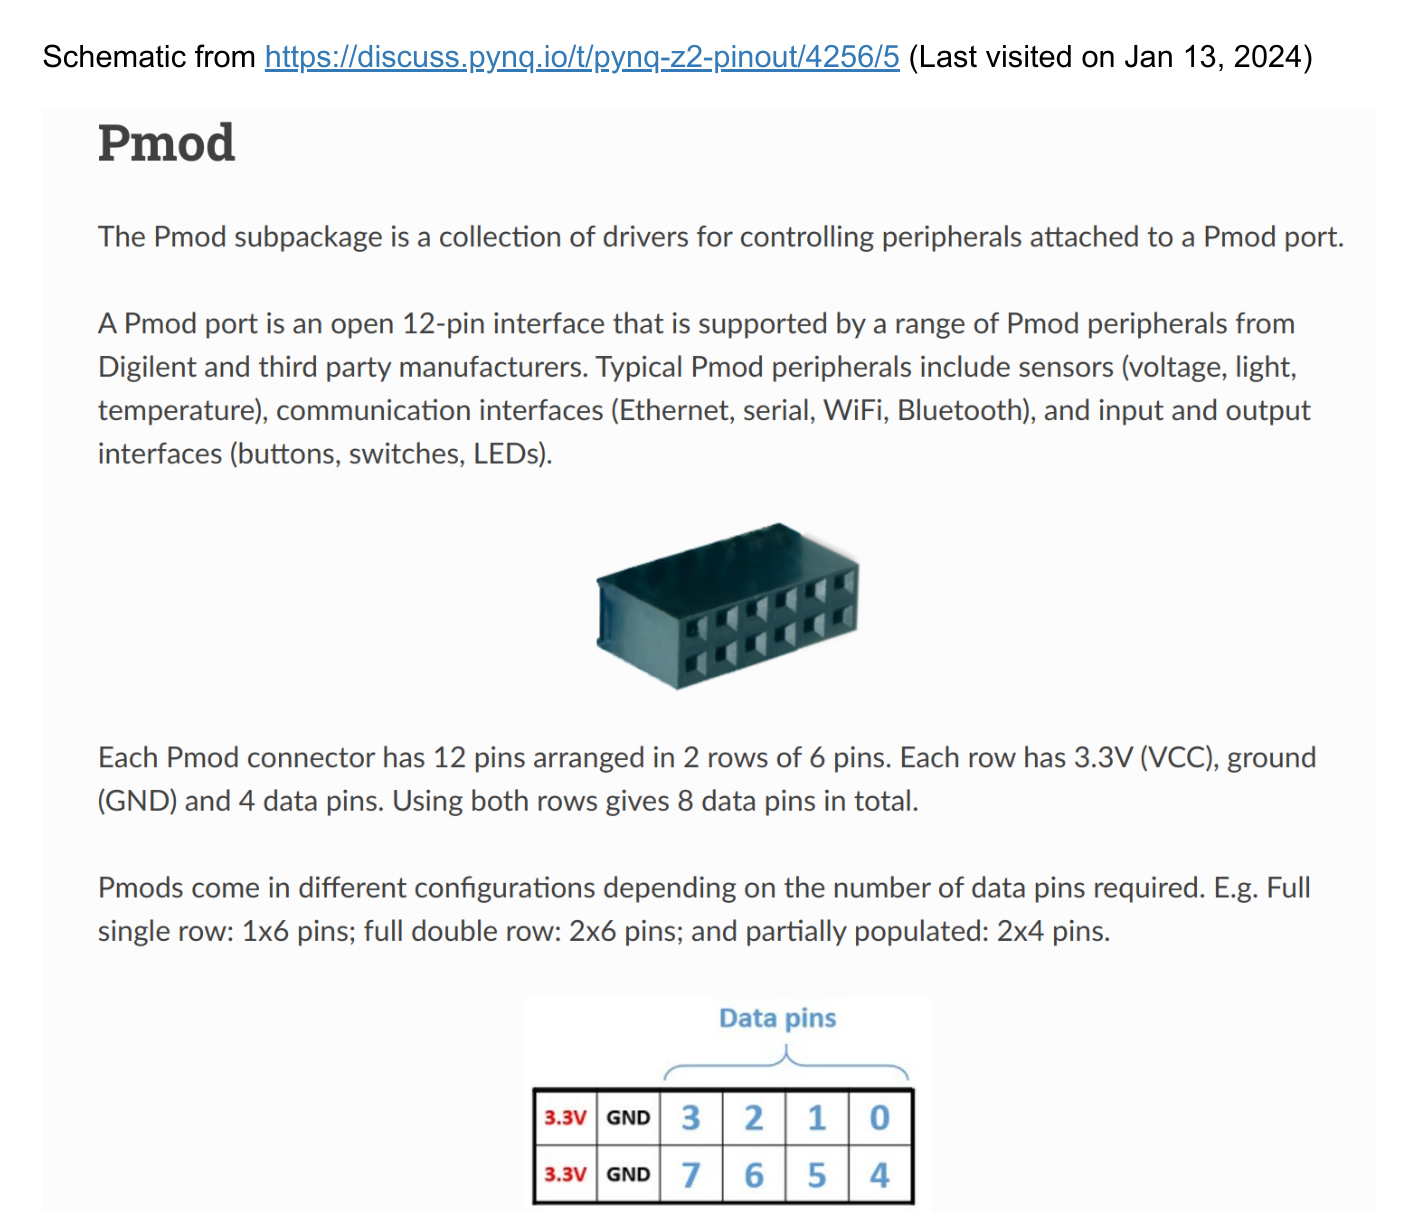

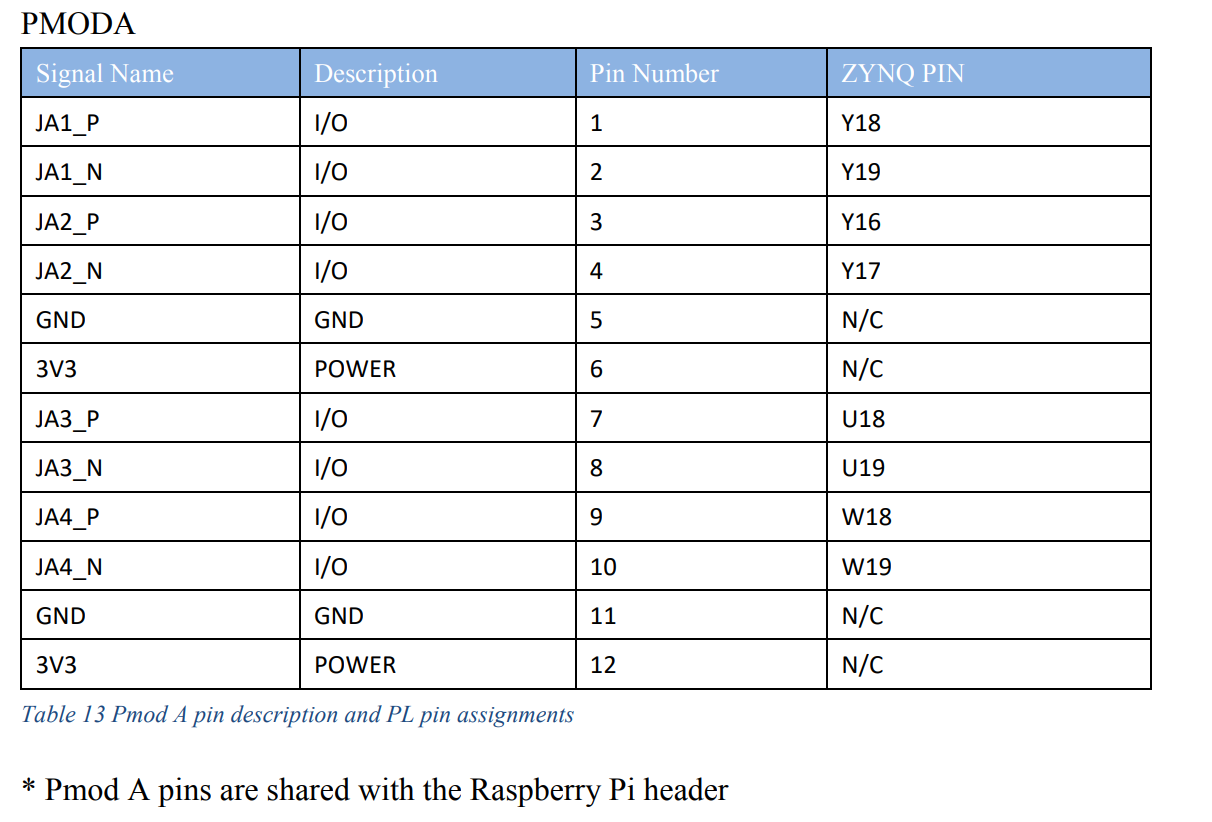
https://www.mouser.com/datasheet/2/744/pynqz2_user_manual_v1_0-1525725.pdf

# The buzzer module works as follows <br>

• The ‘-’ pin connects to $\textbf{gnd}$. <br>
• The ‘+’ pin is the $\textbf{signal you want to write}$. <br>
• The middle pin is the power $\textbf{(3.3V)}$ <br>
• Writing a square wave (1, 0, 1, 0, 1, 0, etc) alternating high/low, will generate a tone at the given frequency. <br>
Psuedocode looks like this <br>
– while we want a tone <br>
∗ write gpio value high <br>
∗ sleep for 1/(2 * tone_freq) <br>
∗ write gpio_value low <br>
∗ sleep for 1/(2 * tone_freq) <br>

In [1]:
from pynq.overlays.base import BaseOverlay
import time

base = BaseOverlay("base.bit")
btns = base.btns_gpio

In [2]:
%%microblaze base.PMODA

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

In [3]:
def setAllOff():
    for i in range(0, 8):
        write_gpio(i, 0) 

In [4]:
setAllOff()

In [5]:
def runBuzzer(rt, f):
    T = 1/f # period
    maxCnt = int(rt / T) # number of period 
    interval = 1/(2*f)
    print('running ', maxCnt * 2 * interval, ' sec\n'
          'max count: ', maxCnt, 
          'period: ', 2 * interval)

    write_gpio(3, 1)                  #  middle pin power  (3.3V)
    cnt = 0
    while (cnt<maxCnt):
        cnt+=1
        write_gpio(2, 1)              # ‘+’ pin, signal you want to write   
        time.sleep(interval)
        write_gpio(2, 0)
        time.sleep(interval)
   
    print('done, buzzer is off...')
    setAllOff()

In [6]:
# test run of buzzer module
setAllOff()
rt, f= 15, 5  #rt: run time (sec), f: tone_freq (Hz),  dc: duty cycle (%) 
runBuzzer(rt, f)
time.sleep(3)

running  15.0  sec
max count:  75 period:  0.2
done, buzzer is off...
